In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'C:\\Users\\filia\\Springboard DS\\Capstone 2\\US Births 2018'

In [2]:
df = pd.read_csv('Cap2_Clean.csv')
df.head()

Unnamed: 0   BMI  CIG_0  DBWT  DLMP_MM  DOB_MM  DOB_TT   DOB_WK  DWgt_R  \
0           1  33.3      2  3242       12       1    1704   Monday     185   
1           2  30.0      0  3470        4       1     336   Monday     273   
2           3  23.7      0  3140        5       1     938   Monday     138   
3           5  31.3      0  4082        3       1      28   Monday     247   
4           6  23.0      0  3180        3       1     341  Tuesday     170   

                 ILOP_R  ...        MHISPX  MRAVE6 M_Ht_In NO_INFEC NO_RISKS  \
0  First Natality Event  ...  Non-Hispanic    AIAN      63        T        F   
1  First Natality Event  ...  Non-Hispanic   White      71        T        F   
2  First Natality Event  ...  Non-Hispanic    AIAN      64        T        T   
3  First Natality Event  ...  Non-Hispanic   White      67        T        T   
4  First Natality Event  ...  Non-Hispanic   White      70        T        T   

   PRECARE PREVIS PWgt_R  SEX  WTGAIN  
0        3      9    188    F       0  
1        5     17    215    M      58  
2        5      6    138    F       0  
3        2     13    200    F      47  
4        3      6    160    F      10  

[5 rows x 23 columns]

In [3]:
df = df.drop(['Unnamed: 0','ILOP_R'], axis=1)
df.head()

BMI  CIG_0  DBWT  DLMP_MM  DOB_MM  DOB_TT   DOB_WK  DWgt_R IP_GON  MAGER  \
0  33.3      2  3242       12       1    1704   Monday     185      N     35   
1  30.0      0  3470        4       1     336   Monday     273      N     28   
2  23.7      0  3140        5       1     938   Monday     138      N     23   
3  31.3      0  4082        3       1      28   Monday     247      N     26   
4  23.0      0  3180        3       1     341  Tuesday     170      N     28   

   ...        MHISPX MRAVE6 M_Ht_In  NO_INFEC NO_RISKS PRECARE  PREVIS  \
0  ...  Non-Hispanic   AIAN      63         T        F       3       9   
1  ...  Non-Hispanic  White      71         T        F       5      17   
2  ...  Non-Hispanic   AIAN      64         T        T       5       6   
3  ...  Non-Hispanic  White      67         T        T       2      13   
4  ...  Non-Hispanic  White      70         T        T       3       6   

   PWgt_R  SEX WTGAIN  
0     188    F      0  
1     215    M     58  
2     138    F      0  
3     200    F     47  
4     160    F     10  

[5 rows x 21 columns]

In [4]:
df[['DBWT']].describe().T

count         mean         std    min     25%     50%     75%  \
DBWT  2754768.0  3267.158804  579.468157  227.0  2970.0  3305.0  3629.0   

         max  
DBWT  8165.0

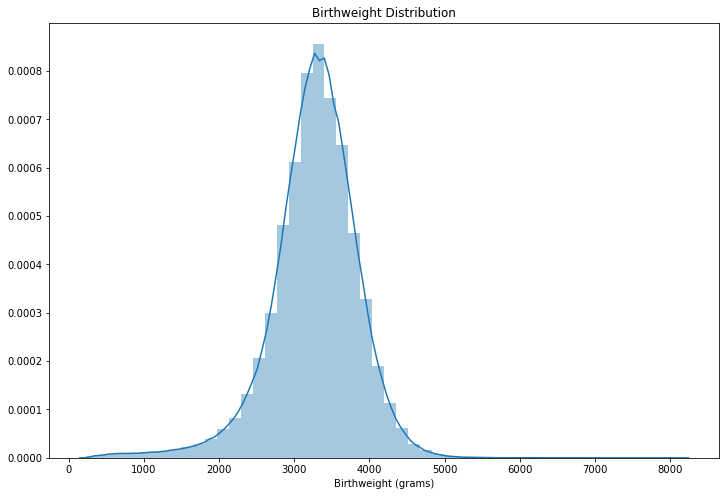

In [87]:
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df['DBWT']).set_title('Birthweight Distribution')
plt.xlabel("Birthweight (grams)")
plt.show()

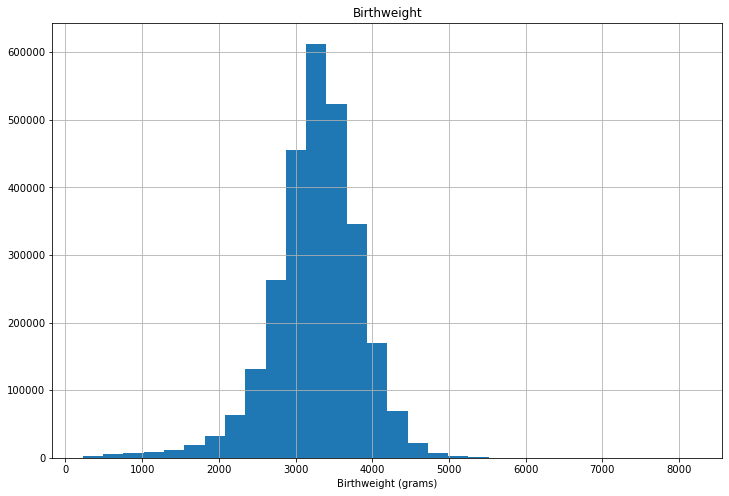

In [88]:
f, ax = plt.subplots(figsize=(12, 8))
df.DBWT.hist(bins=30)
plt.title('Birthweight')
plt.xlabel("Birthweight (grams)")
plt.show()

Text(0.5, 1.0, 'Birthweight Box Plot')

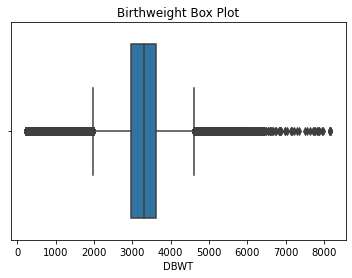

In [89]:
sns.boxplot(df['DBWT']).set_title('Birthweight Box Plot')

In [8]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()
print(df_cat.columns)

Index(['DOB_WK', 'IP_GON', 'MEDUC', 'MHISPX', 'MRAVE6', 'NO_INFEC', 'NO_RISKS',
       'SEX'],
      dtype='object')


In [9]:
#select continuous variables only
df_con_list = [col for col in df.columns if col not in df_cat.columns]
print(df_con_list)
df_con = df[df_con_list]

['BMI', 'CIG_0', 'DBWT', 'DLMP_MM', 'DOB_MM', 'DOB_TT', 'DWgt_R', 'MAGER', 'M_Ht_In', 'PRECARE', 'PREVIS', 'PWgt_R', 'WTGAIN']


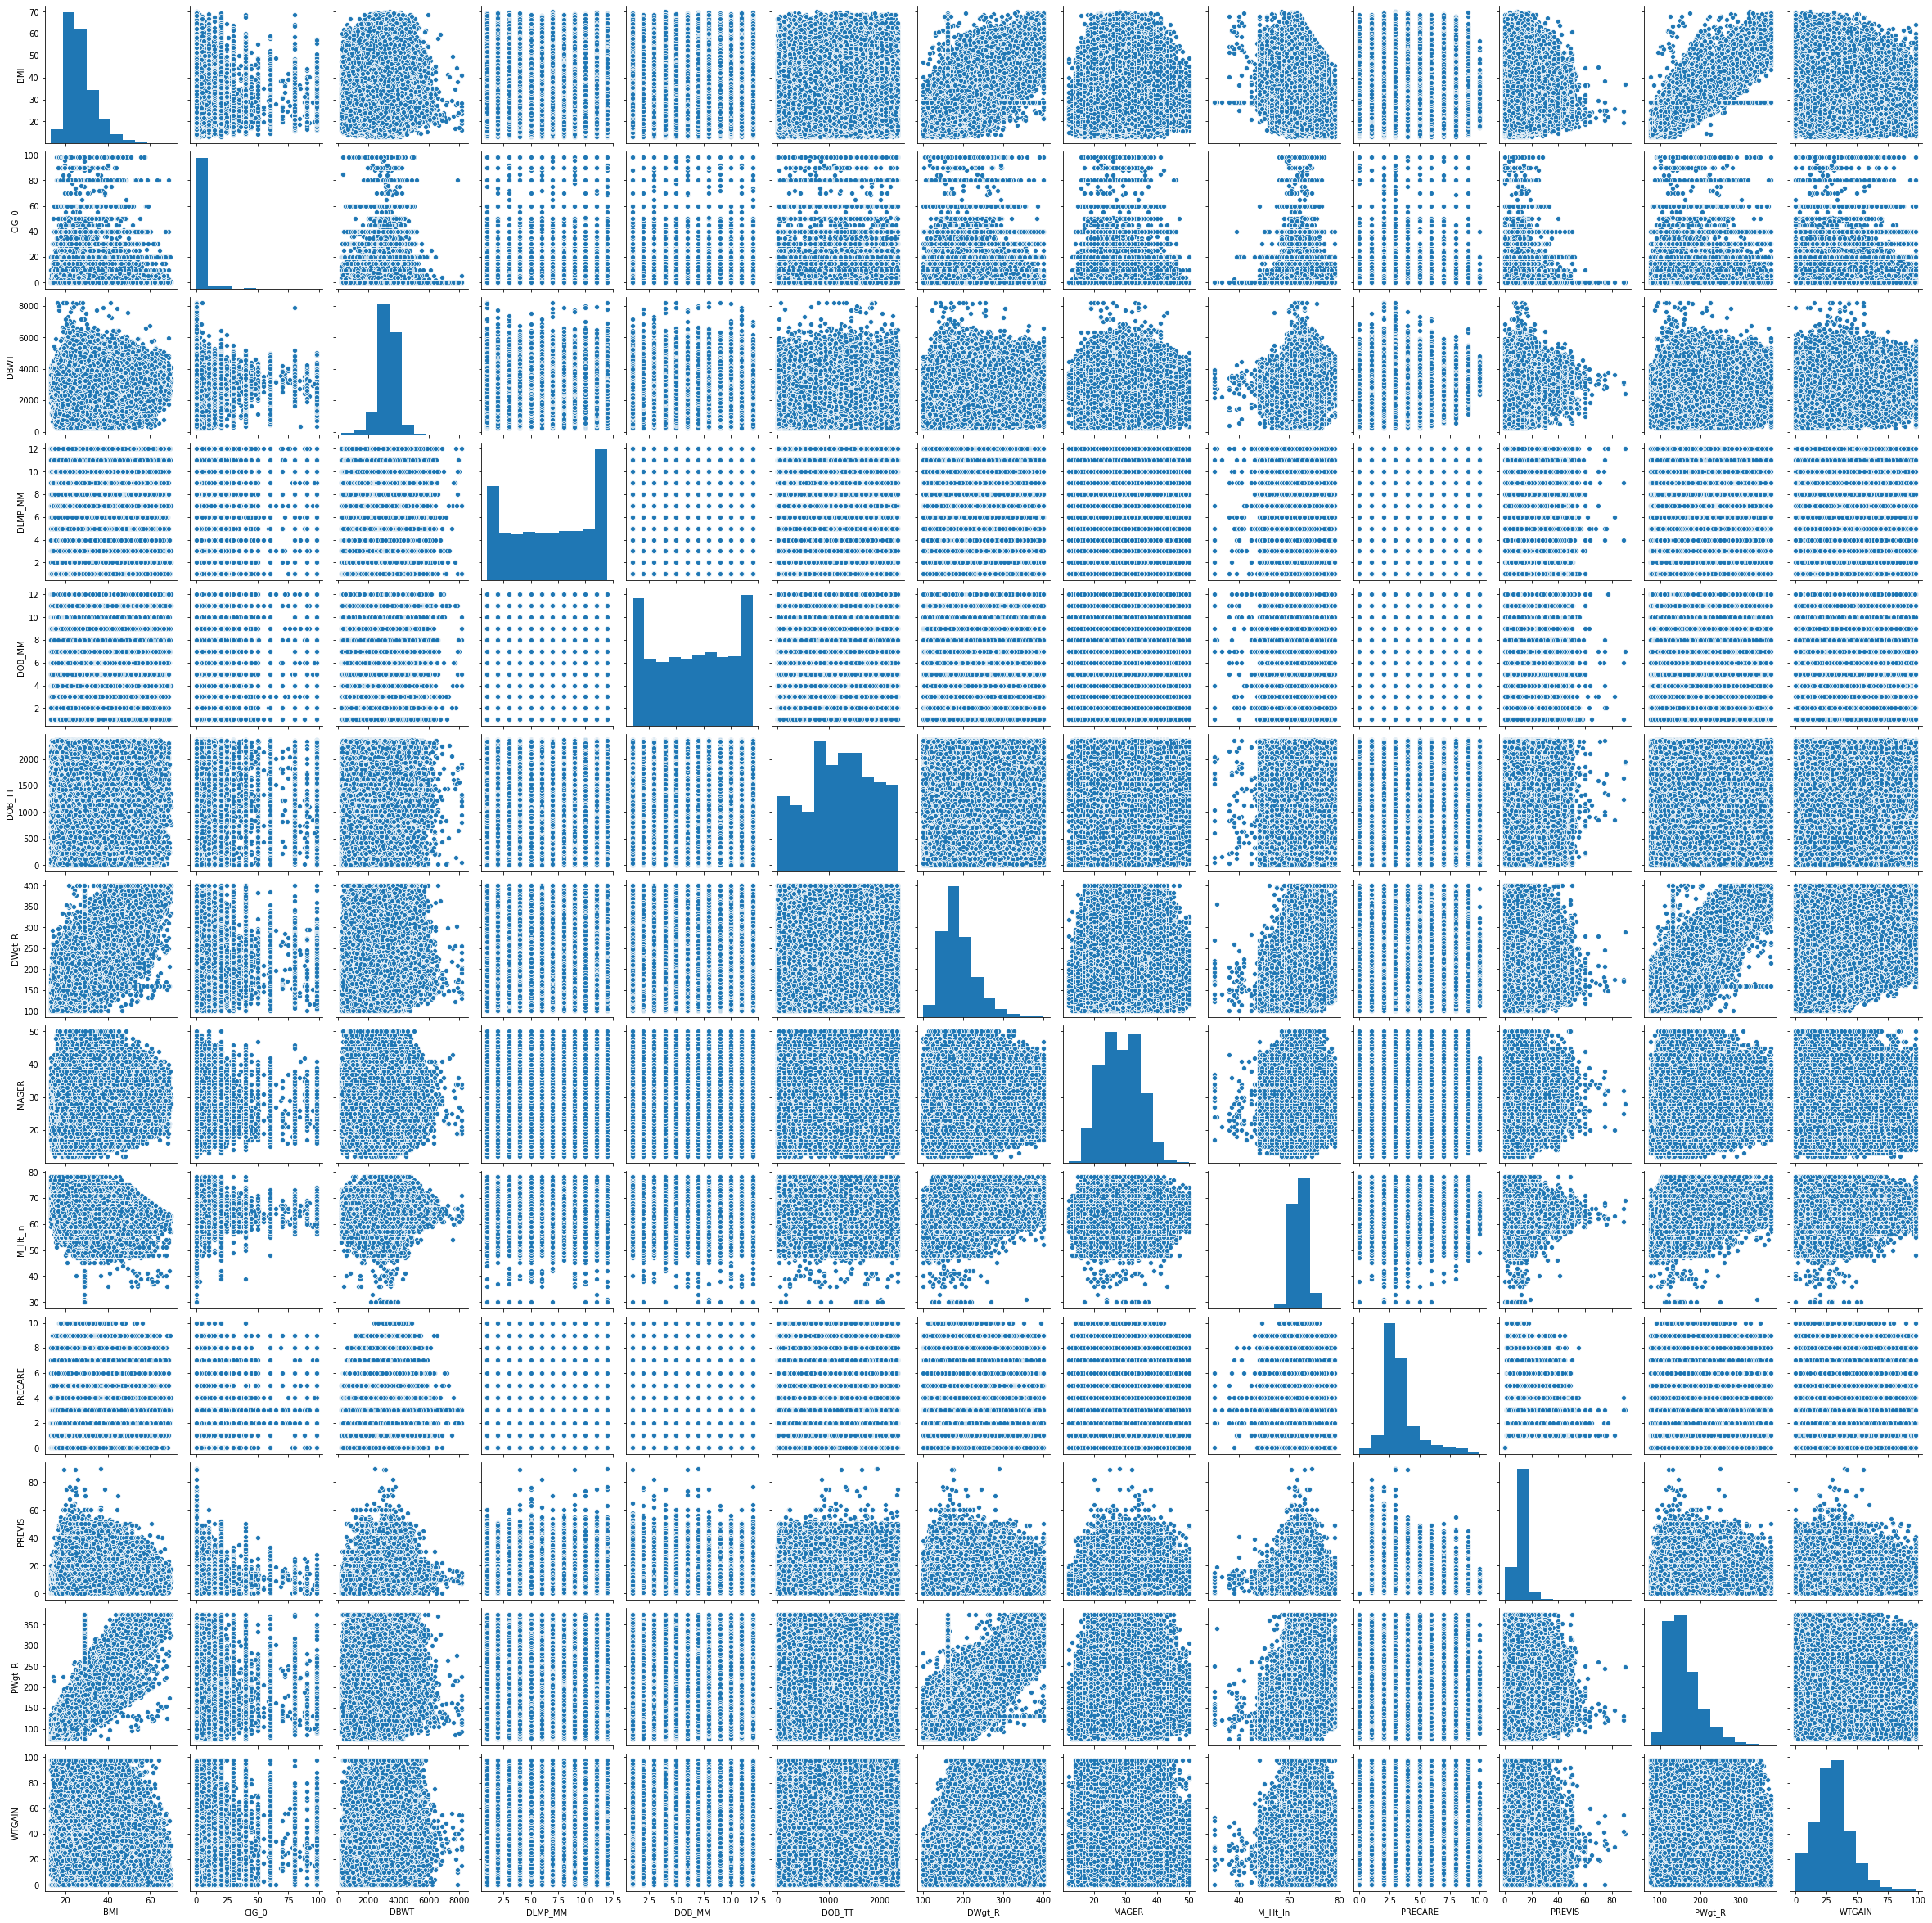

In [10]:
sns.pairplot(df_con)

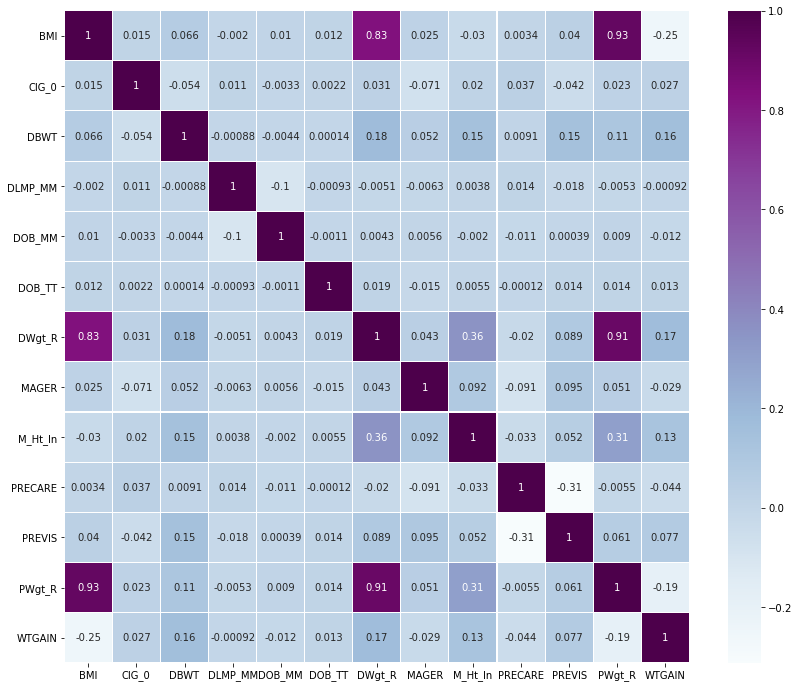

In [13]:
#Calculate the correlation coefficients
corr = df.corr()

#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(corr,linewidths=.1,cmap="BuPu", annot=True)
plt.yticks(rotation=0);

7.881317047388382


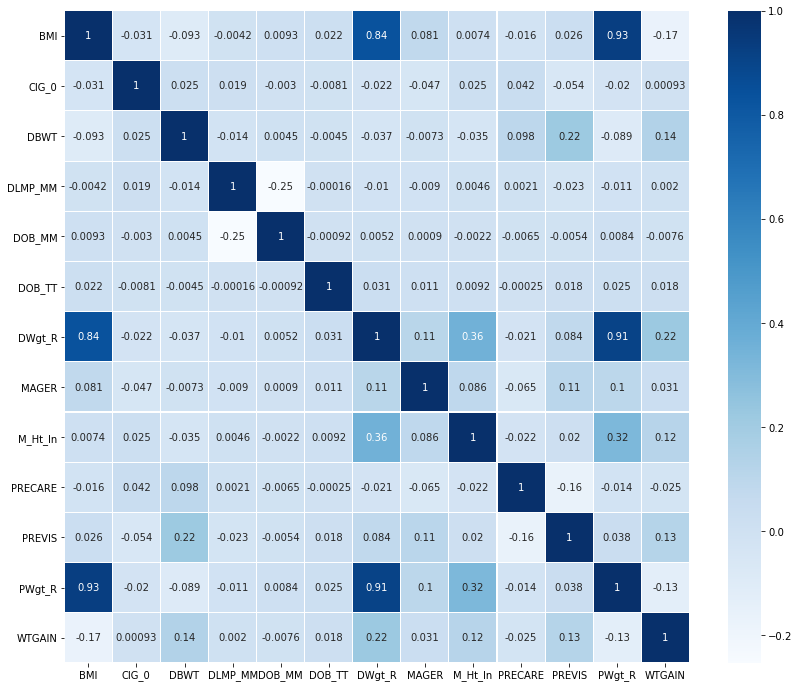

In [21]:
# Explore what factors are correlated with low birth weight if any
LBW = df[df['DBWT'] < 2500]

#Percent of lbw entries from entire dataframe of 1st time moms
print(len(LBW)/len(df) * 100)

#Calculate the correlation coefficients
LBW_corr = LBW.corr()

#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(LBW_corr,linewidths=.1,cmap="Blues", annot=True)
plt.yticks(rotation=0);

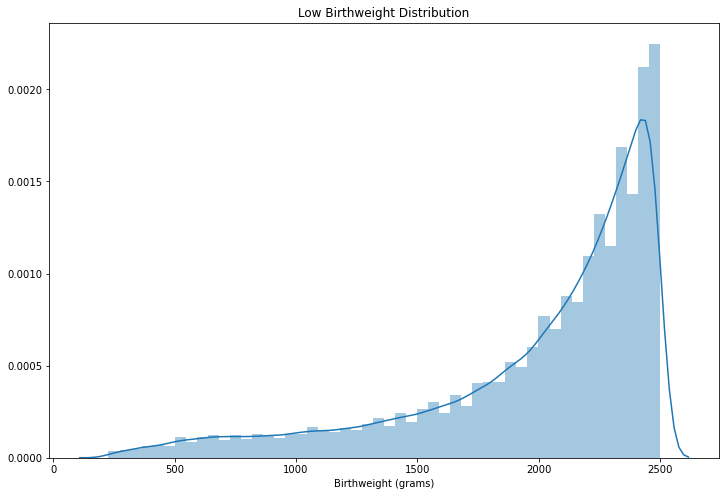

In [86]:
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(LBW['DBWT']).set_title('Low Birthweight Distribution')
plt.xlabel("Birthweight (grams)")
plt.show()

In [14]:
#correlation ratios of categorical columns
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [95]:
dic_eta = {}
for col in df_cat.columns:
    
    eta = correlation_ratio(df_cat[col].to_numpy(),df['DBWT'].to_numpy())
    dic_eta[col] = [round(eta,3)]

#print(dic_eta)
etas=pd.DataFrame(dic_eta)
etas.head()

DOB_WK  IP_GON  MEDUC  MHISPX  MRAVE6  NO_INFEC  NO_RISKS    SEX
0   0.029   0.019  0.088   0.022   0.147     0.037     0.068  0.097

In [23]:
LBW_cat = LBW.select_dtypes(include = 'object').copy()

dic_eta_LBW = {}
for col in LBW_cat.columns:
    
    LBWeta = correlation_ratio(LBW_cat[col].to_numpy(),LBW['DBWT'].to_numpy())
    dic_eta_LBW[col] = LBWeta

print(dic_eta_LBW)
#ratios = correlation_ratio(df_cat,df)

{'DOB_WK': 0.039355537883636105, 'IP_GON': 0.001743556552234768, 'MEDUC': 0.03056914087785313, 'MHISPX': 0.012981129703401083, 'MRAVE6': 0.06890506268961946, 'NO_INFEC': 0.0034574939906230353, 'NO_RISKS': 0.04833768852513964, 'SEX': 0.037240070875501415}


M    1409188
F    1345580
Name: SEX, dtype: int64


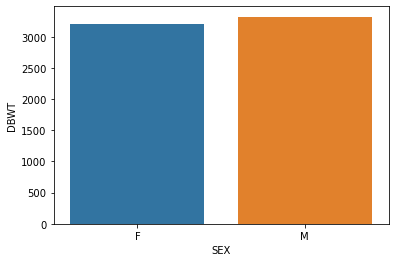

In [32]:
print(df_cat.SEX.value_counts())
sns.barplot(x="SEX", y="DBWT", data=df)

F    114804
M    102308
Name: SEX, dtype: int64


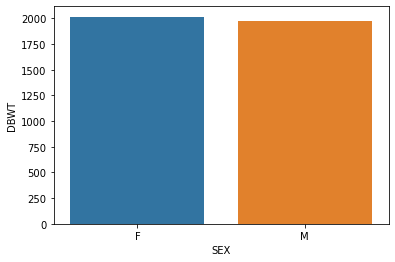

In [33]:
print(LBW.SEX.value_counts())
sns.barplot(x="SEX", y="DBWT", data=LBW)

0     2555658
20      58394
10      52983
5       21337
3       10125
       ...   
69          1
96          1
41          1
47          1
34          1
Name: CIG_0, Length: 69, dtype: int64


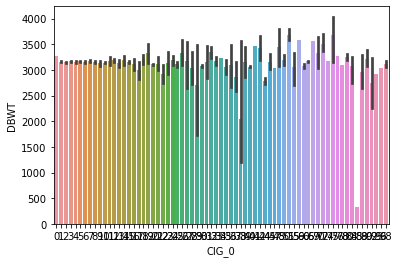

In [35]:
print(df.CIG_0.value_counts())
sns.barplot(x="CIG_0", y="DBWT", data=df)

0     193075
20      7494
10      6287
5       2381
3       1127
2        980
4        897
40       861
6        734
1        729
15       586
7        424
30       418
8        371
12       206
60       139
9         73
98        61
25        50
80        32
18        21
14        21
11        20
13        18
16        16
24        14
50        10
21        10
35        10
45         9
17         9
22         6
36         4
28         3
90         3
19         2
38         2
23         2
31         1
29         1
48         1
92         1
85         1
88         1
27         1
Name: CIG_0, dtype: int64


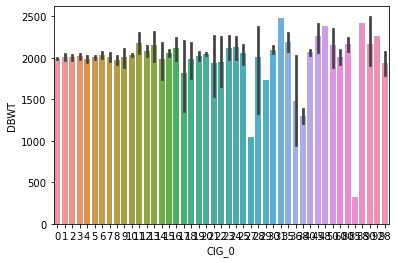

In [36]:
print(LBW.CIG_0.value_counts())
sns.barplot(x="CIG_0", y="DBWT", data=LBW)

2     1143534
3      833685
4      242815
1      161656
5      122828
6       76249
7       60742
0       49014
8       45808
9       18117
10        320
Name: PRECARE, dtype: int64


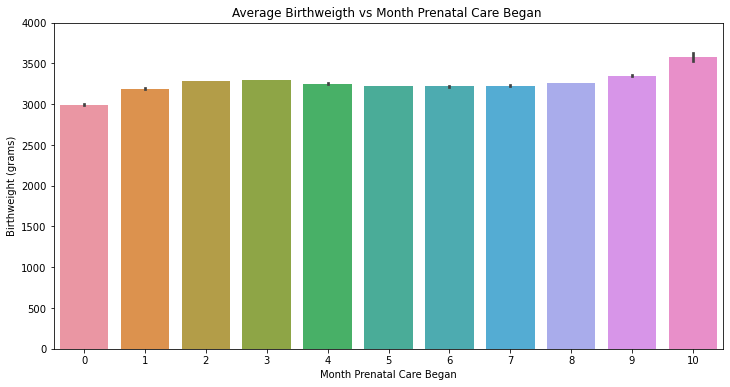

In [96]:
print(df.PRECARE.value_counts())

f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="PRECARE", y="DBWT", data=df).set_title('Average Birthweigth vs Month Prenatal Care Began ')
plt.xlabel("Month Prenatal Care Began")
plt.ylabel("Birthweight (grams)")
plt.ylim(0,4000,250)
plt.show(ax)

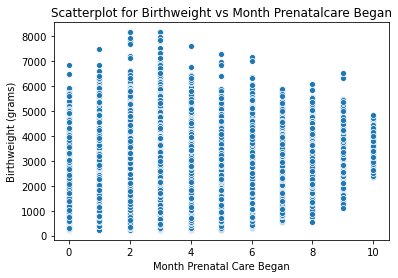

In [68]:
#print(df.PRECARE.value_counts())
ax2 = sns.scatterplot(x="PRECARE", y="DBWT", data=df).set_title('Scatterplot for Birthweight vs Month Prenatalcare Began')
plt.xlabel("Month Prenatal Care Began")
plt.ylabel("Birthweight (grams)")
plt.show()

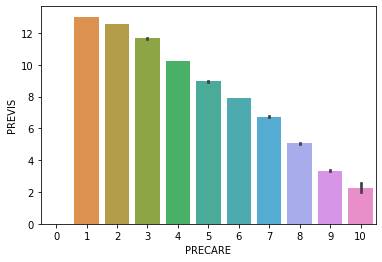

In [50]:
sns.barplot(x="PRECARE", y="PREVIS", data=df)

12    359051
11    230386
10    229357
1     220652
8     220558
9     220113
5     217791
7     214866
3     214515
6     214501
4     210881
2     202097
Name: DLMP_MM, dtype: int64


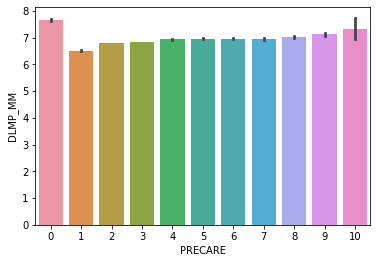

In [52]:
print(df.DLMP_MM.value_counts())
sns.barplot(x="PRECARE", y="DLMP_MM", data=df)

12    359051
11    230386
10    229357
1     220652
8     220558
9     220113
5     217791
7     214866
3     214515
6     214501
4     210881
2     202097
Name: DLMP_MM, dtype: int64


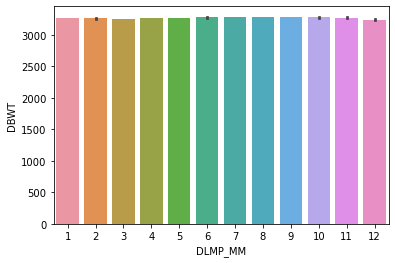

In [53]:
print(df.DLMP_MM.value_counts())
sns.barplot(x="DLMP_MM", y="DBWT", data=df)

2     86383
3     58944
4     19412
1     17509
5     10896
0      9162
6      6655
7      4897
8      2759
9       493
10        2
Name: PRECARE, dtype: int64


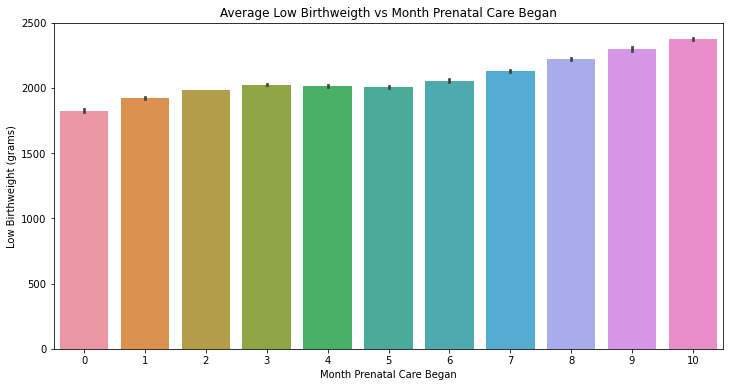

In [97]:
print(LBW.PRECARE.value_counts())
f, ax3 = plt.subplots(figsize=(12, 6))
ax3 = sns.barplot(x="PRECARE", y="DBWT", data=LBW).set_title('Average Low Birthweigth vs Month Prenatal Care Began')
plt.xlabel("Month Prenatal Care Began")
plt.ylabel("Low Birthweight (grams)")
plt.ylim(0,2500,250)
plt.show(ax3)

White                 2046675
Black                  407861
Asia                   195428
More than one race      69657
AIAN                    25560
NHOPI                    9587
Name: MRAVE6, dtype: int64


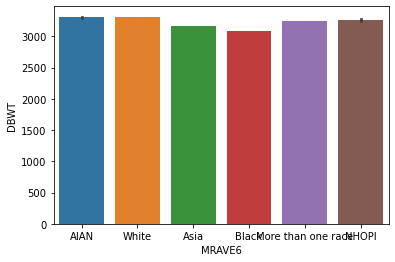

In [44]:
print(df.MRAVE6.value_counts())
sns.barplot(x="MRAVE6", y="DBWT", data=df)

White                 138531
Black                  53492
Asia                   16518
More than one race      5861
AIAN                    1915
NHOPI                    795
Name: MRAVE6, dtype: int64


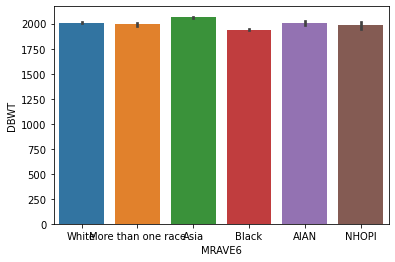

In [45]:
print(LBW.MRAVE6.value_counts())
sns.barplot(x="MRAVE6", y="DBWT", data=LBW)

High school grad or GED             740920
Bachelor's                          577850
Some college                        524206
Master's                            264032
9th-12th w/ no diploma              263342
Associate's                         219319
8th grade or less                    87520
Doctorate or Professional Degree     77579
Name: MEDUC, dtype: int64


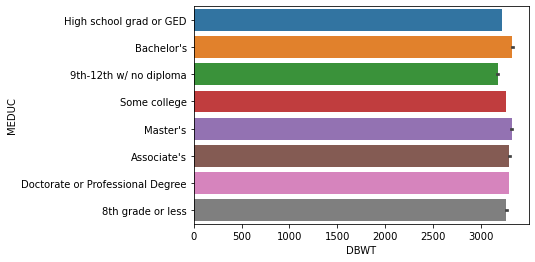

In [46]:
print(df.MEDUC.value_counts())
sns.barplot(x="DBWT", y="MEDUC", data=df)

High school grad or GED             66660
Some college                        42305
Bachelor's                          36699
9th-12th w/ no diploma              26388
Master's                            17379
Associate's                         16220
8th grade or less                    6193
Doctorate or Professional Degree     5268
Name: MEDUC, dtype: int64


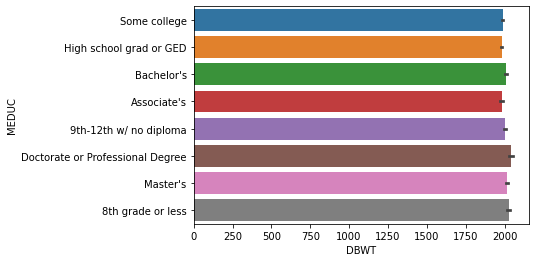

In [47]:
print(LBW.MEDUC.value_counts())
sns.barplot(x="DBWT", y="MEDUC", data=LBW)

N    2746573
Y       8195
Name: IP_GON, dtype: int64


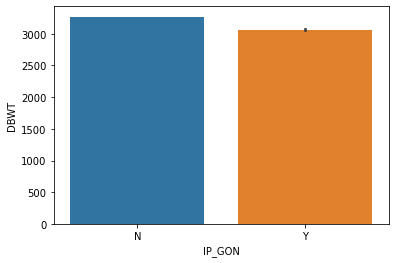

In [48]:
print(df_cat.IP_GON.value_counts())
sns.barplot(x="IP_GON", y="DBWT", data=df)

N    215993
Y      1119
Name: IP_GON, dtype: int64


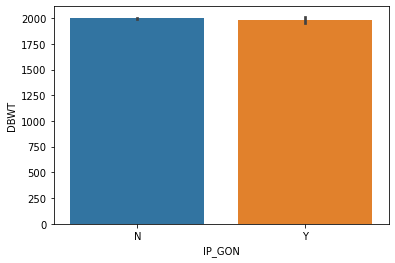

In [49]:
print(LBW.IP_GON.value_counts())
sns.barplot(x="IP_GON", y="DBWT", data=LBW)

In [60]:
print(df.M_Ht_In.value_counts())
#sns.barplot(x="M_Ht_In", y="DBWT", data=df)

64    419604
63    360526
62    349581
65    325397
66    299973
67    236657
61    199420
60    154515
68    130184
69     87150
59     64476
70     43536
71     22945
58     16659
57     14738
72     10716
56      5471
73      3544
55      2300
74      1735
54      1084
53      1047
75       633
78       537
48       386
76       366
49       347
77       341
52       317
51       275
50       213
30        14
47        12
45        11
46         9
39         9
40         8
41         7
36         6
42         5
38         5
37         4
43         2
44         1
33         1
31         1
Name: M_Ht_In, dtype: int64
